### Part 1 Q1 Import the data. Analyse the dimensions of the data. Visualise the data. 

In [1]:
## The the provided training data is kept under train directory in the working directory.
## Import the data using glob and 
## Store the filenames in one of the lists.
## import the images into the numpy array to create our training data (x).

import glob
import numpy as np
from PIL import Image
import os, sys


filelist = glob.glob('./train/*/*.png')
filelistOrig = filelist.copy()


In [2]:
final_size = 32;

#X_train = np.array([np.array(Image.open(fname), dtype=object) for fname in filelist])

X_train_list = []


for img in filelistOrig:
    ## Open the image and convert it to three channels RGB.
    ## Few of the images are grey scale and few are of having 4 channels.
    ## convert('RGB') function will flatten the image to the three channels.
    im = Image.open(img).convert('RGB')
    ## Resize the image to 32x32.
    im = im.resize( (32,32), Image.ANTIALIAS)
    np_img = np.array(im)
    X_train_list.append(np_img)


In [3]:
X_train_orig = np.asarray(X_train_list)

In [4]:
X_train_orig.shape

(4767, 32, 32, 3)

In [5]:
## Import the filenames and extract only the folder names which represent the labels with is our Y_train data
import re
for i in range(len(filelist)):
    result = re.search('\/train\/(.*)\/', filelist[i])
    filelist[i] = result.group(1)    

In [6]:
## Store the list into the np array.
y_train_orig = np.array([np.array(fname) for fname in filelist])

In [7]:
## Let's evaluate the data now.

print(X_train_orig.shape)
print(y_train_orig.shape)

(4767, 32, 32, 3)
(4767,)


Label: Cleavers


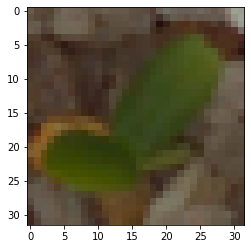

In [8]:
## Let's randomly print one image at the location 250.

import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train_orig[250]))
plt.imshow(X_train_orig[250], cmap='gray')

label image: Charlock  original file: ./train/Charlock/f39a873f8.png
label image: Scentless Mayweed  original file: ./train/Scentless Mayweed/737fe1702.png
label image: Loose Silky-bent  original file: ./train/Loose Silky-bent/e311f2112.png
label image: Charlock  original file: ./train/Charlock/921ef57b0.png
label image: Small-flowered Cranesbill  original file: ./train/Small-flowered Cranesbill/b13a3aa91.png
label image: Fat Hen  original file: ./train/Fat Hen/c386194a6.png
label image: Loose Silky-bent  original file: ./train/Loose Silky-bent/6530d3c24.png
label image: Black-grass  original file: ./train/Black-grass/c8884407d.png
label image: Loose Silky-bent  original file: ./train/Loose Silky-bent/7a6ab6192.png
label image: Small-flowered Cranesbill  original file: ./train/Small-flowered Cranesbill/34cdf6c71.png


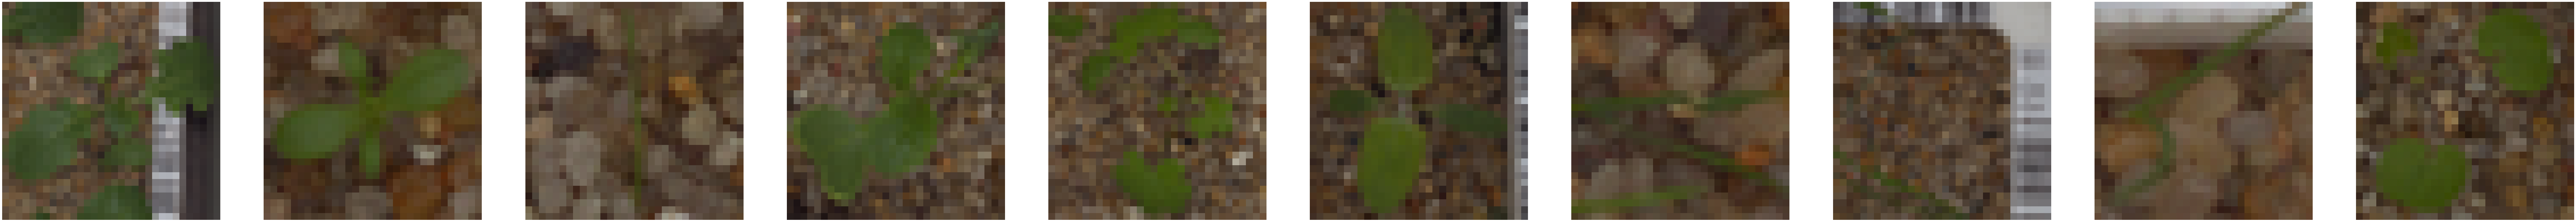

In [9]:
import random

# visualizing the random 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 150))
for i in range(10):
    plt.subplot(1, 10, i+1)
    ix = random.randrange(1,4767,30)
    plt.imshow(X_train_orig[ix], cmap="gray")
    plt.axis('off')
    print('label image:', (y_train_orig[ix]), ' original file:' , filelistOrig[ix])
    
plt.show()

In [10]:
## Let's normalize the training data
# Normalization
X_train_orig = X_train_orig/255.0

## Let's split the data to train and validation

## Divide the data in test-train split

from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_orig,y_train_orig, test_size = 0.2, random_state = 0)

print ("X Training Data shape:", X_train.shape)
print ("X Validation Data shape:", X_val.shape)
print ("Y Training Data shape:", y_train.shape)
print ("Y Validation Data shape:", y_val.shape)

X Training Data shape: (3813, 32, 32, 3)
X Validation Data shape: (954, 32, 32, 3)
Y Training Data shape: (3813,)
Y Validation Data shape: (954,)


### At this stage, we have extracted the data in X_train and y_train. While doing this, we have flattened the size to 32x32 and converted the number of channels to 3 to make the data of right dimensions.

##### Part 1 Q2 - Train tune and test AIML image classifier model using 
#### •Supervised learning algorithms 
#### •Neural networks 
#### •CNN 

### Train and Test the data using Supervised learning algorithm:

In [11]:
## Let's train the data using Supervised learning algorithm
## In order to implement the supervised learning model, we have to reshape the array to 2D format
X_train2d = X_train.reshape(3813, 32*32*3)
X_val2d = X_val.reshape(954, 32*32*3)
print ("X Training Data shape post reshape:", X_train2d.shape)
print ("X Validation Data shape post reshape:", X_val2d.shape)


X Training Data shape post reshape: (3813, 3072)
X Validation Data shape post reshape: (954, 3072)


In [12]:
## Let's try using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier



modelrcf =RandomForestClassifier()

modelrcf.fit(X_train2d,y_train)


RandomForestClassifier()

In [13]:
score_list = []
classifiers_list = []

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Let's predict using this model
y_pred_rcf = modelrcf.predict(X_val2d)

rcf_score = accuracy_score(y_pred_rcf,y_val)

score_list.append(rcf_score)
classifiers_list.append ('RCF')

print ('Accuracy Score : Random Forest Classifier:', rcf_score)

print(classification_report(y_pred_rcf,y_val))


Accuracy Score : Random Forest Classifier: 0.5482180293501048
                           precision    recall  f1-score   support

              Black-grass       0.24      0.57      0.34        23
                 Charlock       0.60      0.60      0.60        73
                 Cleavers       0.54      0.66      0.59        50
         Common Chickweed       0.78      0.61      0.68       148
             Common wheat       0.11      1.00      0.21         4
                  Fat Hen       0.43      0.55      0.49        76
         Loose Silky-bent       0.83      0.39      0.53       277
                    Maize       0.33      1.00      0.49        13
        Scentless Mayweed       0.69      0.47      0.56       136
          Shepherds Purse       0.00      0.00      0.00         1
Small-flowered Cranesbill       0.84      0.77      0.80       122
               Sugar beet       0.22      0.61      0.33        31

                 accuracy                           0.55       95

In [14]:
## Let's try Decision Tree
from sklearn.tree import DecisionTreeClassifier

modeldtc=DecisionTreeClassifier()

modeldtc.fit(X_train2d,y_train)


DecisionTreeClassifier()

In [15]:
## Let's predict using this model
y_pred_dt = modeldtc.predict(X_val2d)

dtc_score = accuracy_score(y_pred_dt,y_val)

score_list.append(dtc_score)
classifiers_list.append ('DTC')

print ('Accuracy Score : Decision Tree Classifier:', dtc_score)

print(classification_report(y_pred_dt,y_val))

Accuracy Score : Decision Tree Classifier: 0.279874213836478
                           precision    recall  f1-score   support

              Black-grass       0.20      0.20      0.20        54
                 Charlock       0.25      0.25      0.25        72
                 Cleavers       0.33      0.30      0.31        66
         Common Chickweed       0.40      0.35      0.37       132
             Common wheat       0.09      0.07      0.08        41
                  Fat Hen       0.27      0.30      0.28        86
         Loose Silky-bent       0.32      0.30      0.31       135
                    Maize       0.23      0.26      0.24        34
        Scentless Mayweed       0.25      0.22      0.23       104
          Shepherds Purse       0.10      0.12      0.11        51
Small-flowered Cranesbill       0.41      0.47      0.44        98
               Sugar beet       0.21      0.22      0.22        81

                 accuracy                           0.28       954

In [16]:
# Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

modelnb=GaussianNB()

modelnb.fit(X_train2d,y_train)

y_pred_nb=modelnb.predict(X_val2d)

nbcscore = accuracy_score(y_pred_nb,y_val)
score_list.append(nbcscore)
classifiers_list.append ('NBC')

print ('Naive Bayes classifier Score:',nbcscore)
            
print(classification_report(y_pred_nb,y_val))


Naive Bayes classifier Score: 0.20440251572327045
                           precision    recall  f1-score   support

              Black-grass       0.44      0.18      0.26       133
                 Charlock       0.05      0.11      0.07        36
                 Cleavers       0.64      0.39      0.48       100
         Common Chickweed       0.23      0.57      0.33        47
             Common wheat       0.00      0.00      0.00         7
                  Fat Hen       0.03      0.23      0.05        13
         Loose Silky-bent       0.03      0.13      0.05        31
                    Maize       0.03      0.17      0.04         6
        Scentless Mayweed       0.30      0.14      0.19       201
          Shepherds Purse       0.60      0.13      0.22       274
Small-flowered Cranesbill       0.06      0.41      0.11        17
               Sugar beet       0.26      0.25      0.25        89

                 accuracy                           0.20       954
          

In [17]:
## Ada boost Classifier
from sklearn.ensemble import AdaBoostClassifier

modelabcl = AdaBoostClassifier(n_estimators=50, random_state=1)
modelabcl = modelabcl.fit(X_train2d,y_train)

y_pred_abcl=modelabcl.predict(X_val2d)

AdaBScore = accuracy_score(y_pred_nb,y_val)
score_list.append(AdaBScore)
classifiers_list.append ('AdaBoost')



print ('Ada boost Classifier Score:', AdaBScore)
            
print(classification_report(y_pred_abcl,y_val))


Ada boost Classifier Score: 0.20440251572327045
                           precision    recall  f1-score   support

              Black-grass       0.17      0.21      0.19        42
                 Charlock       0.18      0.26      0.21        50
                 Cleavers       0.52      0.30      0.38       106
         Common Chickweed       0.50      0.43      0.47       134
             Common wheat       0.00      0.00      0.00        10
                  Fat Hen       0.40      0.25      0.31       155
         Loose Silky-bent       0.33      0.24      0.28       176
                    Maize       0.38      0.60      0.46        25
        Scentless Mayweed       0.31      0.35      0.33        84
          Shepherds Purse       0.25      0.29      0.27        52
Small-flowered Cranesbill       0.32      0.40      0.35        91
               Sugar beet       0.12      0.34      0.18        29

                 accuracy                           0.31       954
            

### Train and Test the data using Neural Networks:

In [18]:
## It is required to encode the target data into one hot encoded data
## Forst it should be coded into integers and later on on hot encoding would be done.

from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Write a function which will take input as the target data
## Function will return the One hot encoded data and also the models used for one hot encoding and integer encoding.
## The models can be used to reconstruct the original data if needed
def EncodeIntoBinary (TargetData):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(TargetData)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded, label_encoder, onehot_encoder

## Call the function to decode the y_train and y_val data
y_train_enc, y_train_label_encoder, y_train_one_hot_encoder  = EncodeIntoBinary(y_train)
y_val_enc, y_val_label_encoder, y_val_one_hot_encoder = EncodeIntoBinary(y_val)

## y_train_enc and y_val_enc data represents the one hot encoded array.
print (y_train_enc.shape)
print (y_val_enc.shape)   

(3813, 12)
(954, 12)


In [19]:
# converting y data into categorical (one-hot encoding)
##y_train_cat = to_categorical(y_train)
##y_val_cat = to_categorical(y_val)

print(X_train.shape, X_val.shape,X_train2d.shape, X_val2d.shape, y_train_enc.shape, y_val_enc.shape)

(3813, 32, 32, 3) (954, 32, 32, 3) (3813, 3072) (954, 3072) (3813, 12) (954, 12)


##### Let's build the NN model on above datasets (X_train2d, X_val2d, y_train_enc, y_val_enc)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout


In [21]:
def mlp_model():
    
    model = Sequential()
    model.add(Dense(50, input_shape = (3072, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(12, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
        
    adam = optimizers.Adam(lr = 0.005)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
modelnn = mlp_model()
history = modelnn.fit(X_train2d, y_train_enc, batch_size=60, epochs = 150, verbose = 1)

2022-02-28 21:49:12.447805: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/mandarkhire/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
64/64 [==============================] - 2s 4ms/step - loss: 2.3144 - accuracy: 0.2098
Epoch 2/150
64/64 [==============================] - 0s 4ms/step - loss: 1.7198 - accuracy: 0.3976
Epoch 3/150
64/64 [==============================] - 0s 4ms/step - loss: 1.3940 - accuracy: 0.5025
Epoch 4/150
64/64 [==============================] - 0s 3ms/step - loss: 1.1791 - accuracy: 0.5856
Epoch 5/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9875 - accuracy: 0.6580
Epoch 6/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.6835
Epoch 7/150
64/64 [==============================] - 0s 3ms/step - loss: 0.7806 - accuracy: 0.7299
Epoch 8/150
64/64 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.7527
Epoch 9/150
64/64 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.7768
Epoch 10/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.8151
Epoch 11/

64/64 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9732
Epoch 84/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9795
Epoch 85/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9748
Epoch 86/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9782
Epoch 87/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9761
Epoch 88/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 89/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 90/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9793
Epoch 91/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 92/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 93/150


In [23]:
resultsnn = modelnn.evaluate(X_val2d, y_val_enc)

30/30 [==============================] - 0s 1ms/step - loss: 3.4217 - accuracy: 0.5063


In [24]:
score_list.append(resultsnn[1])
classifiers_list.append ('NN')

### Train and Test the data using CNN:

In [25]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

# Initialising the CNN classifier
modelcnn = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
modelcnn.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
modelcnn.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
modelcnn.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
modelcnn.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
modelcnn.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
modelcnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
modelcnn.add(Flatten())

# Adding a fully connected layer with 512 neurons
modelcnn.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
modelcnn.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
modelcnn.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
modelcnn.add(Dense(units = 12, activation = 'softmax'))

In [26]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
modelcnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
# There are 3813 training images and 954 test images in total
# X_train.shape, X_val.shape, y_train_enc.shape, y_val_enc.shape
modelcnn.fit(X_train, y_train_enc, batch_size=200, epochs = 65, verbose = 1)

Epoch 1/65
20/20 [==============================] - 2s 75ms/step - loss: 2.4260 - accuracy: 0.1437
Epoch 2/65
20/20 [==============================] - 2s 77ms/step - loss: 2.3449 - accuracy: 0.2148
Epoch 3/65
20/20 [==============================] - 2s 78ms/step - loss: 2.0583 - accuracy: 0.2785
Epoch 4/65
20/20 [==============================] - 2s 81ms/step - loss: 1.8177 - accuracy: 0.3454
Epoch 5/65
20/20 [==============================] - 2s 76ms/step - loss: 1.7104 - accuracy: 0.3706
Epoch 6/65
20/20 [==============================] - 2s 75ms/step - loss: 1.6025 - accuracy: 0.4039
Epoch 7/65
20/20 [==============================] - 2s 77ms/step - loss: 1.5638 - accuracy: 0.4251
Epoch 8/65
20/20 [==============================] - 2s 78ms/step - loss: 1.5150 - accuracy: 0.4508
Epoch 9/65
20/20 [==============================] - 2s 78ms/step - loss: 1.4513 - accuracy: 0.4653
Epoch 10/65
20/20 [==============================] - 2s 76ms/step - loss: 1.4194 - accuracy: 0.4881
Epoch 11/

In [28]:
resultscnn = modelcnn.evaluate(X_val, y_val_enc)

30/30 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.7914


In [29]:
print (resultscnn[1])
score_list.append(resultscnn[1])
classifiers_list.append ('CNN')

0.7914046049118042


### Part 1 Q3 Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case

#### Comparison of the results.

We have two lists score_list which has accuracy scores and classifiers_list which has the corresponding names of the algorithms. 

Let's plot the results on the graph

In [30]:
import pandas as pd

df = pd.DataFrame(list(zip(score_list, classifiers_list)), columns =['Score', 'Classifier'])

df.head(10)

,Score,Classifier
0,0.548218,RCF
1,0.279874,DTC
2,0.204403,NBC
3,0.204403,AdaBoost
4,0.506289,NN
5,0.791405,CNN


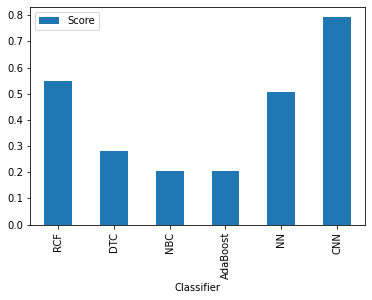

In [31]:
import matplotlib.pyplot as pls 
df.plot(x='Classifier', y='Score', kind='bar') 
plt.show()

##### Above graph indicates that the accuracy achieved using CNN is the highest and reaching to about 80%.

This means that the CNN model is the best out of the evaluated models and should be pickled for future use.

### Part 1 Q4 Pickle the best performing mode

In [32]:
## Let's save the best model for future use

## Let's store the model in h5 format using the Tensorflow functions available
# saving and loading the .h5 model
 
# save model
modelcnn.save('MK-Project-Comp Vision.h5')
print('Model Saved!')

Model Saved!


### Part 1 Q5 Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [33]:
## Load the image to be predicted
filelistpred = glob.glob('./Seedling - Prediction/*.png')
print (filelistpred)

['./Seedling - Prediction/Predict.png']


In [34]:
## Resize the image to 32x32.
impred = Image.open(filelistpred[0]).convert('RGB').resize( (32,32), Image.ANTIALIAS)

In [35]:
x_final_pred = np.array(impred)

In [36]:
x_final_pred.shape

(32, 32, 3)

In [37]:
x_final_pred = x_final_pred.reshape(1,32,32,3)

Final Prediciton Image


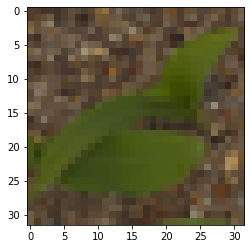

In [38]:
## Let's print the image
import matplotlib.pyplot as plt
%matplotlib inline
print("Final Prediciton Image")
plt.imshow(x_final_pred[0], cmap='gray')

In [39]:
## Let's normalize the data
# Normalization
x_final_pred = x_final_pred/255.0

In [40]:
y_pred = modelcnn.predict(x_final_pred)

In [41]:
## Let's identify the original label using inverse_transform of the model used to perform integer encoding

predicted_label = y_train_label_encoder.inverse_transform([np.argmax(y_pred[0:12][0])])

print ('Prediction of the above image is:', predicted_label)
 

Prediction of the above image is: ['Maize']


### Conclusion

- The image provided is predicted as 'Maize'
- The best model is based on CNN and is pickled as MK-Project-Comp Vision.h5 in local directory
- Looking at the scores from other models, it is evident that from complex image data processing, the CNN models work best. (The only con is that the processing time is highest for CNN)